# MACS-30123 Final Project: Weeks-on-board Prediction

In [1]:
sc.install_pypi_package("boto3") # use boto3 to see book data in S3 bucket

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
2,application_1654160718252_0003,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached https://files.pythonhosted.org/packages/ce/3d/dc2fedf59cac4c7bd60362ccea1c1b299bb7952a9c2d563a7277a0c69e93/boto3-1.24.1-py3-none-any.whl

You are using pip version 9.0.1, however version 22.1.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.

## Import data amd process the data

In [2]:
import boto3

s3 = boto3.resource('s3')
bucket = 'final-project-raw-data'
bucket_resource = s3.Bucket(bucket)

for obj in bucket_resource.objects.all():
    print(obj.last_modified,"\t", obj.key, "\n")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

2022-06-02 06:34:04+00:00 	 lyrics_1958.csv 

2022-06-02 06:34:04+00:00 	 lyrics_1959.csv 

2022-06-02 06:34:05+00:00 	 lyrics_1960.csv 

2022-06-02 06:34:05+00:00 	 lyrics_1961.csv 

2022-06-02 06:34:05+00:00 	 lyrics_1962.csv 

2022-06-02 06:34:05+00:00 	 lyrics_1963.csv 

2022-06-02 06:34:05+00:00 	 lyrics_1964.csv 

2022-06-02 06:34:05+00:00 	 lyrics_1965.csv 

2022-06-02 06:34:05+00:00 	 lyrics_1966.csv 

2022-06-02 06:34:05+00:00 	 lyrics_1967.csv 

2022-06-02 06:34:06+00:00 	 lyrics_1968.csv 

2022-06-02 06:34:06+00:00 	 lyrics_1969.csv 

2022-06-02 06:34:06+00:00 	 lyrics_1970.csv 

2022-06-02 06:34:06+00:00 	 lyrics_1971.csv 

2022-06-02 06:34:06+00:00 	 lyrics_1972.csv 

2022-06-02 06:34:06+00:00 	 lyrics_1973.csv 

2022-06-02 06:34:06+00:00 	 lyrics_1974.csv 

2022-06-02 06:34:06+00:00 	 lyrics_1975.csv 

2022-06-02 06:34:06+00:00 	 lyrics_1976.csv 

2022-06-02 06:34:07+00:00 	 lyrics_1977.csv 

2022-06-02 06:34:07+00:00 	 lyrics_1978.csv 

2022-06-02 06:34:07+00:00 	 lyrics

In [3]:
# install packages

sc.install_pypi_package("pandas==1.0.3")
sc.install_pypi_package("scipy==1.4.1")
sc.install_pypi_package("matplotlib==3.2.1")
sc.install_pypi_package("seaborn==0.10.1")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached https://files.pythonhosted.org/packages/4a/6a/94b219b8ea0f2d580169e85ed1edc0163743f55aaeca8a44c2e8fc1e344e/pandas-1.0.3-cp37-cp37m-manylinux1_x86_64.whl

  Using cached https://files.pythonhosted.org/packages/dd/82/c1fe128f3526b128cfd185580ba40d01371c5d299fcf7f77968e22dfcc2e/scipy-1.4.1-cp37-cp37m-manylinux1_x86_64.whl

  Using cached https://files.pythonhosted.org/packages/b2/c2/71fcf957710f3ba1f09088b35776a799ba7dd95f7c2b195ec800933b276b/matplotlib-3.2.1-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/6c/10/a7d0fa5baea8fe7b50f448ab742f26f52b80bfca85ac2be9d35cdd9a3246/pyparsing-3.0.9-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/5c/f9/695d6bedebd747e5eb0fe8fad57b72fdf25411273a39791cde838d5a8f51/cycler-0.11.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/51/50/9a9a94afa26c50fc5d9127272737806990aa698c7a1c220b8e5075e70304/kiwisolver-1.4.2-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x

In [4]:
# Import Data 

data = spark.read.csv('s3://final-project-raw-data/*.csv',header=True)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [5]:
print('Total Columns: %d' % len(data.dtypes))
print('Total Rows: %d' % data.count())
data.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Total Columns: 6
Total Rows: 5056
root
 |-- Unnamed: 0: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Artist: string (nullable = true)
 |-- song_name: string (nullable = true)
 |-- further_clean_text: string (nullable = true)
 |-- weeks-on-board: string (nullable = true)

In [6]:
# Preprocesse the data

from pyspark.sql.types import IntegerType

data = data.withColumn("weeks-on-board", data["weeks-on-board"].cast(IntegerType()))
data = data.withColumn("Year", data["Year"].cast(IntegerType()))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [7]:
data = data.drop("Unnamed: 0")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [8]:
print('Total Columns: %d' % len(data.dtypes))
print('Total Rows: %d' % data.count())
data.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Total Columns: 5
Total Rows: 5056
root
 |-- Year: integer (nullable = true)
 |-- Artist: string (nullable = true)
 |-- song_name: string (nullable = true)
 |-- further_clean_text: string (nullable = true)
 |-- weeks-on-board: integer (nullable = true)

In [9]:
# create label

data = data.withColumn('long', (data['weeks-on-board'] >= 16).cast("integer"))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [10]:
(data.groupBy('long')
     .count()
     .show()
)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----+-----+
|long|count|
+----+-----+
|null|    4|
|   1| 2540|
|   0| 2512|
+----+-----+

In [11]:
# Check to make sure new column is capturing star_rating correctly
data[['weeks-on-board', 'long']].show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------+----+
|weeks-on-board|long|
+--------------+----+
|            23|   1|
|            18|   1|
|             8|   0|
|             8|   0|
|            32|   1|
+--------------+----+
only showing top 5 rows

In [12]:
print('Total Columns: %d' % len(data.dtypes))
print('Total Rows: %d' % data.count())
data.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Total Columns: 6
Total Rows: 5056
root
 |-- Year: integer (nullable = true)
 |-- Artist: string (nullable = true)
 |-- song_name: string (nullable = true)
 |-- further_clean_text: string (nullable = true)
 |-- weeks-on-board: integer (nullable = true)
 |-- long: integer (nullable = true)

In [13]:
from pyspark.ml import Pipeline, PipelineModel
from pyspark.sql.functions import *
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, IntegerType, StringType
import sparknlp
from sparknlp.pretrained import PretrainedPipeline
from sparknlp.annotator import *
from sparknlp.common import RegexRule
from sparknlp.base import *

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## Feature Engineering

In [14]:
from pyspark.ml.feature import CountVectorizer

cv = CountVectorizer(inputCol="further_clean_text", outputCol="features", vocabSize=3, minDF=2.0)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [15]:
import pyspark.sql.functions as F

data = data.withColumn('lyrics_tk', F.split('further_clean_text', ' '))
data = data.withColumn('name_tk', F.split('song_name', ' '))
data = data.withColumn('lyrics_len', F.length('further_clean_text'))
data = data.withColumn('name_len', F.length('song_name'))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [16]:
# pipline

document = DocumentAssembler() \
    .setInputCol("further_clean_text") \
    .setOutputCol("document")

token = Tokenizer() \
    .setInputCols(["document"]) \
    .setOutputCol("token")

normalizer = Normalizer() \
    .setInputCols(["token"]) \
    .setOutputCol("normal")

vivekn =  ViveknSentimentModel.pretrained() \
    .setInputCols(["document", "normal"]) \
    .setOutputCol("result_sentiment")

finisher = Finisher() \
    .setInputCols(["result_sentiment"]) \
    .setOutputCols("final_sentiment")

pipeline = Pipeline().setStages([document, token, normalizer, vivekn, finisher])

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

sentiment_vivekn download started this may take some time.
Approximate size to download 873.6 KB
[OK!]

In [17]:
# now let's fit the model

pipelineModel = pipeline.fit(data)
result = pipelineModel.transform(data)

result.select("final_sentiment").show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------------+
|final_sentiment|
+---------------+
|[negative]     |
|[positive]     |
|[negative]     |
|[positive]     |
|[positive]     |
|[positive]     |
|[negative]     |
|[positive]     |
|[positive]     |
|[negative]     |
|[negative]     |
|[positive]     |
|[positive]     |
|[positive]     |
|[negative]     |
|[positive]     |
|[negative]     |
|[positive]     |
|[positive]     |
|[positive]     |
+---------------+
only showing top 20 rows

In [18]:
data = result

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [19]:

# now let's convert it to a binary vector

data = data.withColumn("senti_binary", (data.final_sentiment[0] == 'positive').cast("integer"))
data[["senti_binary"]].show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------+
|senti_binary|
+------------+
|0           |
|1           |
|0           |
|1           |
|1           |
|1           |
|0           |
|1           |
|1           |
|0           |
|0           |
|1           |
|1           |
|1           |
|0           |
|1           |
|0           |
|1           |
|1           |
|1           |
+------------+
only showing top 20 rows

In [20]:
# let's take a look at data

print('Total Columns: %d' % len(data.dtypes))
print('Total Rows: %d' % data.count())
data.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Total Columns: 12
Total Rows: 5056
root
 |-- Year: integer (nullable = true)
 |-- Artist: string (nullable = true)
 |-- song_name: string (nullable = true)
 |-- further_clean_text: string (nullable = true)
 |-- weeks-on-board: integer (nullable = true)
 |-- long: integer (nullable = true)
 |-- lyrics_tk: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- name_tk: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- lyrics_len: integer (nullable = true)
 |-- name_len: integer (nullable = true)
 |-- final_sentiment: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- senti_binary: integer (nullable = true)

In [21]:
cv = CountVectorizer(inputCol="lyrics_tk", outputCol="features_ly", vocabSize=3, minDF=2.0)

model = cv.fit(data)
result = model.transform(data)
result[['features_ly']].show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------------+
|features_ly               |
+--------------------------+
|(3,[],[])                 |
|(3,[0],[6.0])             |
|(3,[1,2],[6.0,8.0])       |
|(3,[0,1,2],[1.0,4.0,31.0])|
|(3,[],[])                 |
|(3,[1],[1.0])             |
|(3,[0,1,2],[1.0,1.0,1.0]) |
|(3,[0,1,2],[1.0,3.0,4.0]) |
|(3,[1,2],[1.0,1.0])       |
|(3,[1,2],[10.0,1.0])      |
|(3,[0,1],[5.0,6.0])       |
|(3,[0,1],[2.0,1.0])       |
|(3,[1,2],[12.0,5.0])      |
|(3,[1,2],[1.0,29.0])      |
|(3,[1,2],[1.0,21.0])      |
|(3,[1,2],[1.0,7.0])       |
|(3,[2],[1.0])             |
|(3,[0,2],[9.0,3.0])       |
|(3,[0,1],[2.0,2.0])       |
|(3,[0,2],[1.0,1.0])       |
+--------------------------+
only showing top 20 rows

In [22]:
data = result

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [23]:
cv = CountVectorizer(inputCol="name_tk", outputCol="features_nm", vocabSize=3, minDF=2.0)

model = cv.fit(data)
result = model.transform(data)
result[['features_nm']].show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------+
|features_nm  |
+-------------+
|(3,[],[])    |
|(3,[],[])    |
|(3,[],[])    |
|(3,[],[])    |
|(3,[],[])    |
|(3,[],[])    |
|(3,[],[])    |
|(3,[],[])    |
|(3,[],[])    |
|(3,[],[])    |
|(3,[],[])    |
|(3,[0],[1.0])|
|(3,[],[])    |
|(3,[],[])    |
|(3,[],[])    |
|(3,[],[])    |
|(3,[],[])    |
|(3,[],[])    |
|(3,[],[])    |
|(3,[],[])    |
+-------------+
only showing top 20 rows

In [24]:
data = result

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [25]:
data = data.na.drop("any")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [26]:
# let's take a look at data

print('Total Columns: %d' % len(data.dtypes))
print('Total Rows: %d' % data.count())
data.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Total Columns: 14
Total Rows: 5052
root
 |-- Year: integer (nullable = true)
 |-- Artist: string (nullable = true)
 |-- song_name: string (nullable = true)
 |-- further_clean_text: string (nullable = true)
 |-- weeks-on-board: integer (nullable = true)
 |-- long: integer (nullable = true)
 |-- lyrics_tk: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- name_tk: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- lyrics_len: integer (nullable = true)
 |-- name_len: integer (nullable = true)
 |-- final_sentiment: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- senti_binary: integer (nullable = true)
 |-- features_ly: vector (nullable = true)
 |-- features_nm: vector (nullable = true)

## Build the model

In [27]:
from pyspark.ml.feature import VectorAssembler

features = ['Year', 'lyrics_len', 'name_len', 'senti_binary', 'features_ly','features_nm']
assembler = VectorAssembler(inputCols=features, outputCol='features', handleInvalid="skip") # skip any null value

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [28]:
# build a baseline model

from pyspark.ml.classification import LogisticRegression

lr = LogisticRegression(featuresCol='features', labelCol='long')

# Pipline
ml_pipline = Pipeline(stages =  [assembler])

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [29]:
data = ml_pipline.fit(data).transform(data)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [30]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator


metrics = BinaryClassificationEvaluator(labelCol='long', metricName='areaUnderROC')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [31]:
# Split data in to train and test set

train, test = data.randomSplit([0.8, 0.2])

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [32]:
model = lr.fit(train)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## Performance Report

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

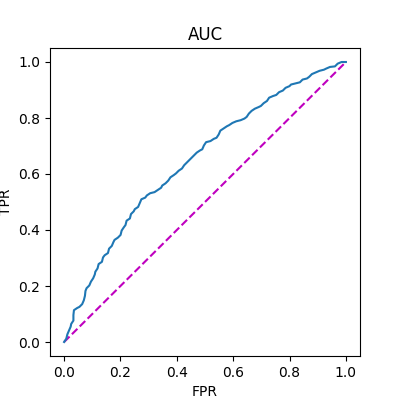

In [48]:
# collect the RPT and TPR

evaluationSummary = model.evaluate(test)
FPR = evaluationSummary.roc.select('FPR').collect()
TPR = evaluationSummary.roc.select('TPR').collect()


# Plot the AUC

import matplotlib.pyplot as plt

plt.figure(figsize=(4,4))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('AUC')
plt.plot([0, 1], [0, 1], 'm--')
plt.plot(FPR,TPR)
plt.show()

%matplot plt

In [34]:
# get the performance of the best model on test data 

metrics.evaluate(model.transform(test))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

0.6478561074235142

In [35]:
# get the false positive rate by label

print(f'The false positive rate for label 0 is {model.summary.falsePositiveRateByLabel[0]}')
print(f'The false positive rate for label 1 is {model.summary.falsePositiveRateByLabel[1]}')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

The false positive rate for label 0 is 0.3665024630541872
The false positive rate for label 1 is 0.4674674674674675

In [36]:
# get the precision by label

print(f'The precision for label 0 is {model.summary.precisionByLabel[0]}')
print(f'The precision for label 1 is {model.summary.precisionByLabel[1]}')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

The precision for label 0 is 0.588495575221239
The precision for label 1 is 0.5792792792792792

In [49]:
# get the precision by label

print(f'The recall for label 0 is {model.summary.recallByLabel[0]}')
print(f'The recall for label 1 is {model.summary.recallByLabel[1]}')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

The recall for label 0 is 0.5325325325325325
The recall for label 1 is 0.6334975369458128